In [16]:
from mpl_toolkits.mplot3d import Axes3D

import numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm 


array([1., 1.])

In [20]:
nx=81
ny=81
nt=100
c=1
dx=2/(nx-1)
dy=2/(ny-1)
dt=.2*dx
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)

u=numpy.ones((ny,nx))
u
un=numpy.ones((ny,nx))

u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2



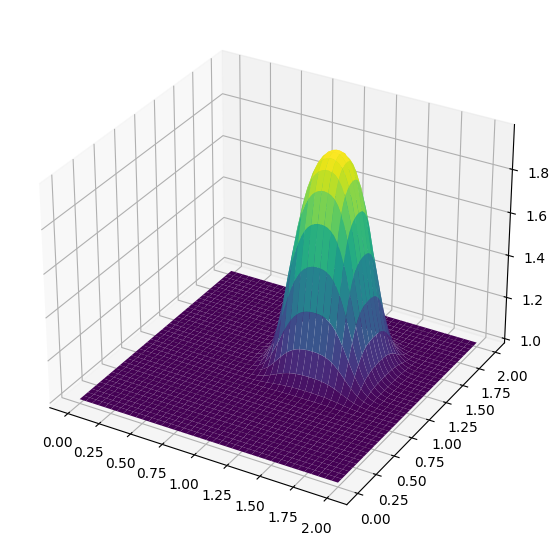

In [31]:
fig=plt.figure(figsize=(11,7),dpi=100)#initilaizing figure size and resolution

ax=plt.axes(projection="3d")

X,Y=numpy.meshgrid(x,y)

surf=ax.plot_surface(X,Y,u[:],cmap=cm.viridis)#plot_surface is same as regular plot command but it takes a grid of x and y values for data point poisitons
#u need to pass grids
#cmap just changes the theme


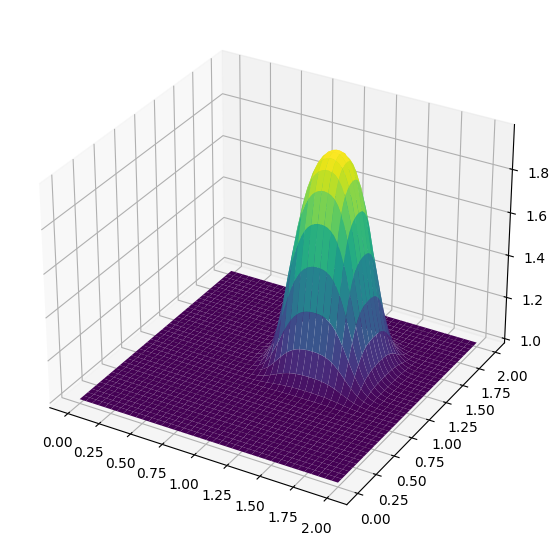

In [35]:
u=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2

for n in range(nt+1):
    un=u.copy()
    row,col=u.shape
    for j in range(1,row):
        for i in range(1,col):
            u[j,i]=-c*(dt/dx)*(un[j,i]-un[j,i-1])-c*(dt/dy)*(un[j,i]-un[j-1,i])+un[j,i]
            
            #boundary conditions
            u[0,:]=1
            u[-1,:]=1
            u[:,0]=1
            u[:,-1]=1

fig=plt.figure(figsize=(11,7),dpi=100)

ax=plt.axes(projection="3d")

X,Y=numpy.meshgrid(x,y)

surf=ax.plot_surface(X,Y,u[:],cmap=cm.viridis)






In [40]:
u=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),:int(.5/dx):int(1/dx+1)]=2
u[0,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

C:\Users\USER\AppData\Local\Temp\ipykernel_1612\4275192821.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


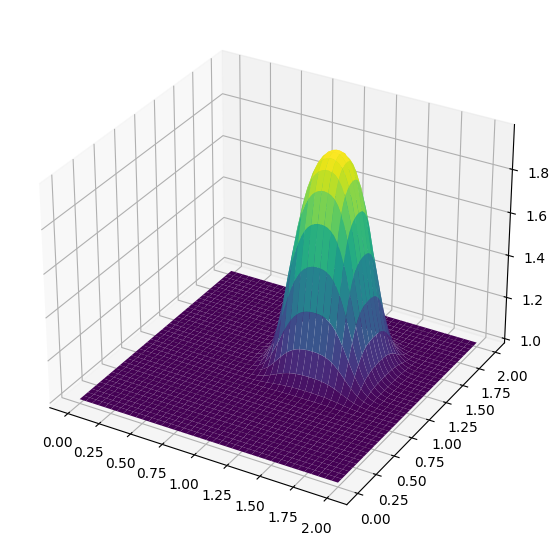

In [50]:
#better code using arrays

u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2


for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)